# Problem Description:

The task is to train a model to predict the number of wins for a given team in the 2015 season based on 16 different features that will be used as the inputs and the output will be number of wins.

Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Complete Game, Shutouts, Saves, and Errors

# Importing the Dataset

In [2]:
#Importing Libraries
import pandas as pd
import numpy as np

In [3]:
#Importing Dataset
df=pd.read_csv('baseball.csv')
#Visualizing first 5 rows of dataset
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In the above Dataframe, we can see there are 16 input columns and an output column 'W'

# Checking Null Values in the DataFrame

In [4]:
#Checking Null values
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

<AxesSubplot:>

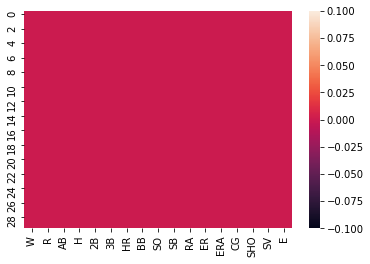

In [5]:
#Using heatmap to check Null Values
import seaborn as sns
sns.heatmap(df.isnull())

Hence, we cannot find any null values in the above Dataset

# Visualization of Data

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

(array([5., 1., 9., 6., 2., 1., 0., 1., 3., 2.]),
 array([ 75. ,  80.1,  85.2,  90.3,  95.4, 100.5, 105.6, 110.7, 115.8,
        120.9, 126. ]),
 <BarContainer object of 10 artists>)

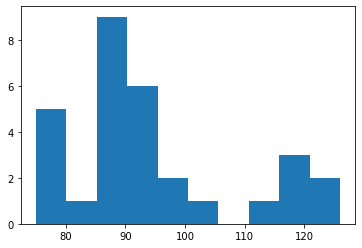

In [7]:
#Univariate Analysis
plt.hist(df['E'],bins=10)

The Errors are more between values 85 to 90

<AxesSubplot:>

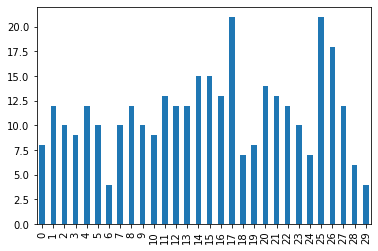

In [8]:
#Univariate Analysis
df['SHO'].plot.bar()

The maximum number of shutouts are at values 17 & 25

<AxesSubplot:xlabel='AB'>

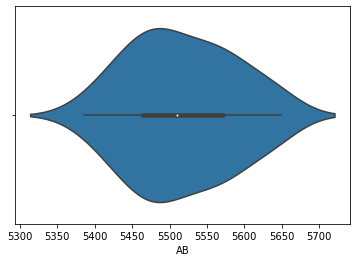

In [9]:
#Univariate Analysis
sns.violinplot(x='AB',data=df)

The maximum data in column At Bats are between values 5450 and 5550

C:\Users\Kartik Jora\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RA', ylabel='Density'>

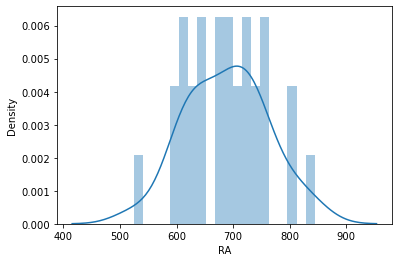

In [10]:
#Univariate Analysis
sns.distplot(df['RA'],bins=20)

The maximum number of Runs Allowed lies between the range 590 to 770 and the data is normally distributed.

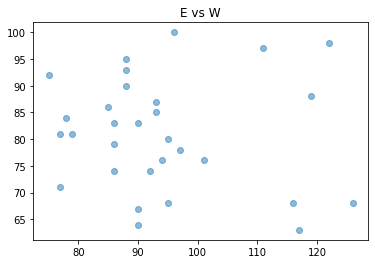

In [11]:
#Bivariate Analysis
plt.scatter(df["E"],df["W"],alpha=0.5)
plt.title("E vs W")
plt.show()

As the number of Errors increased, the number of Wins decreased. Hence they are negatively correlated to each other.

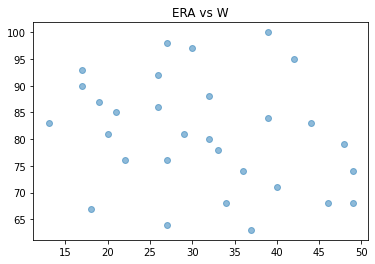

In [12]:
#Bivariate Analysis
plt.scatter(df["3B"],df["W"],alpha=0.5)
plt.title("ERA vs W")
plt.show()

The data is fully scattered and we cannot observe any proper correlation between the columns. Let's try using pairplot for better understanding.

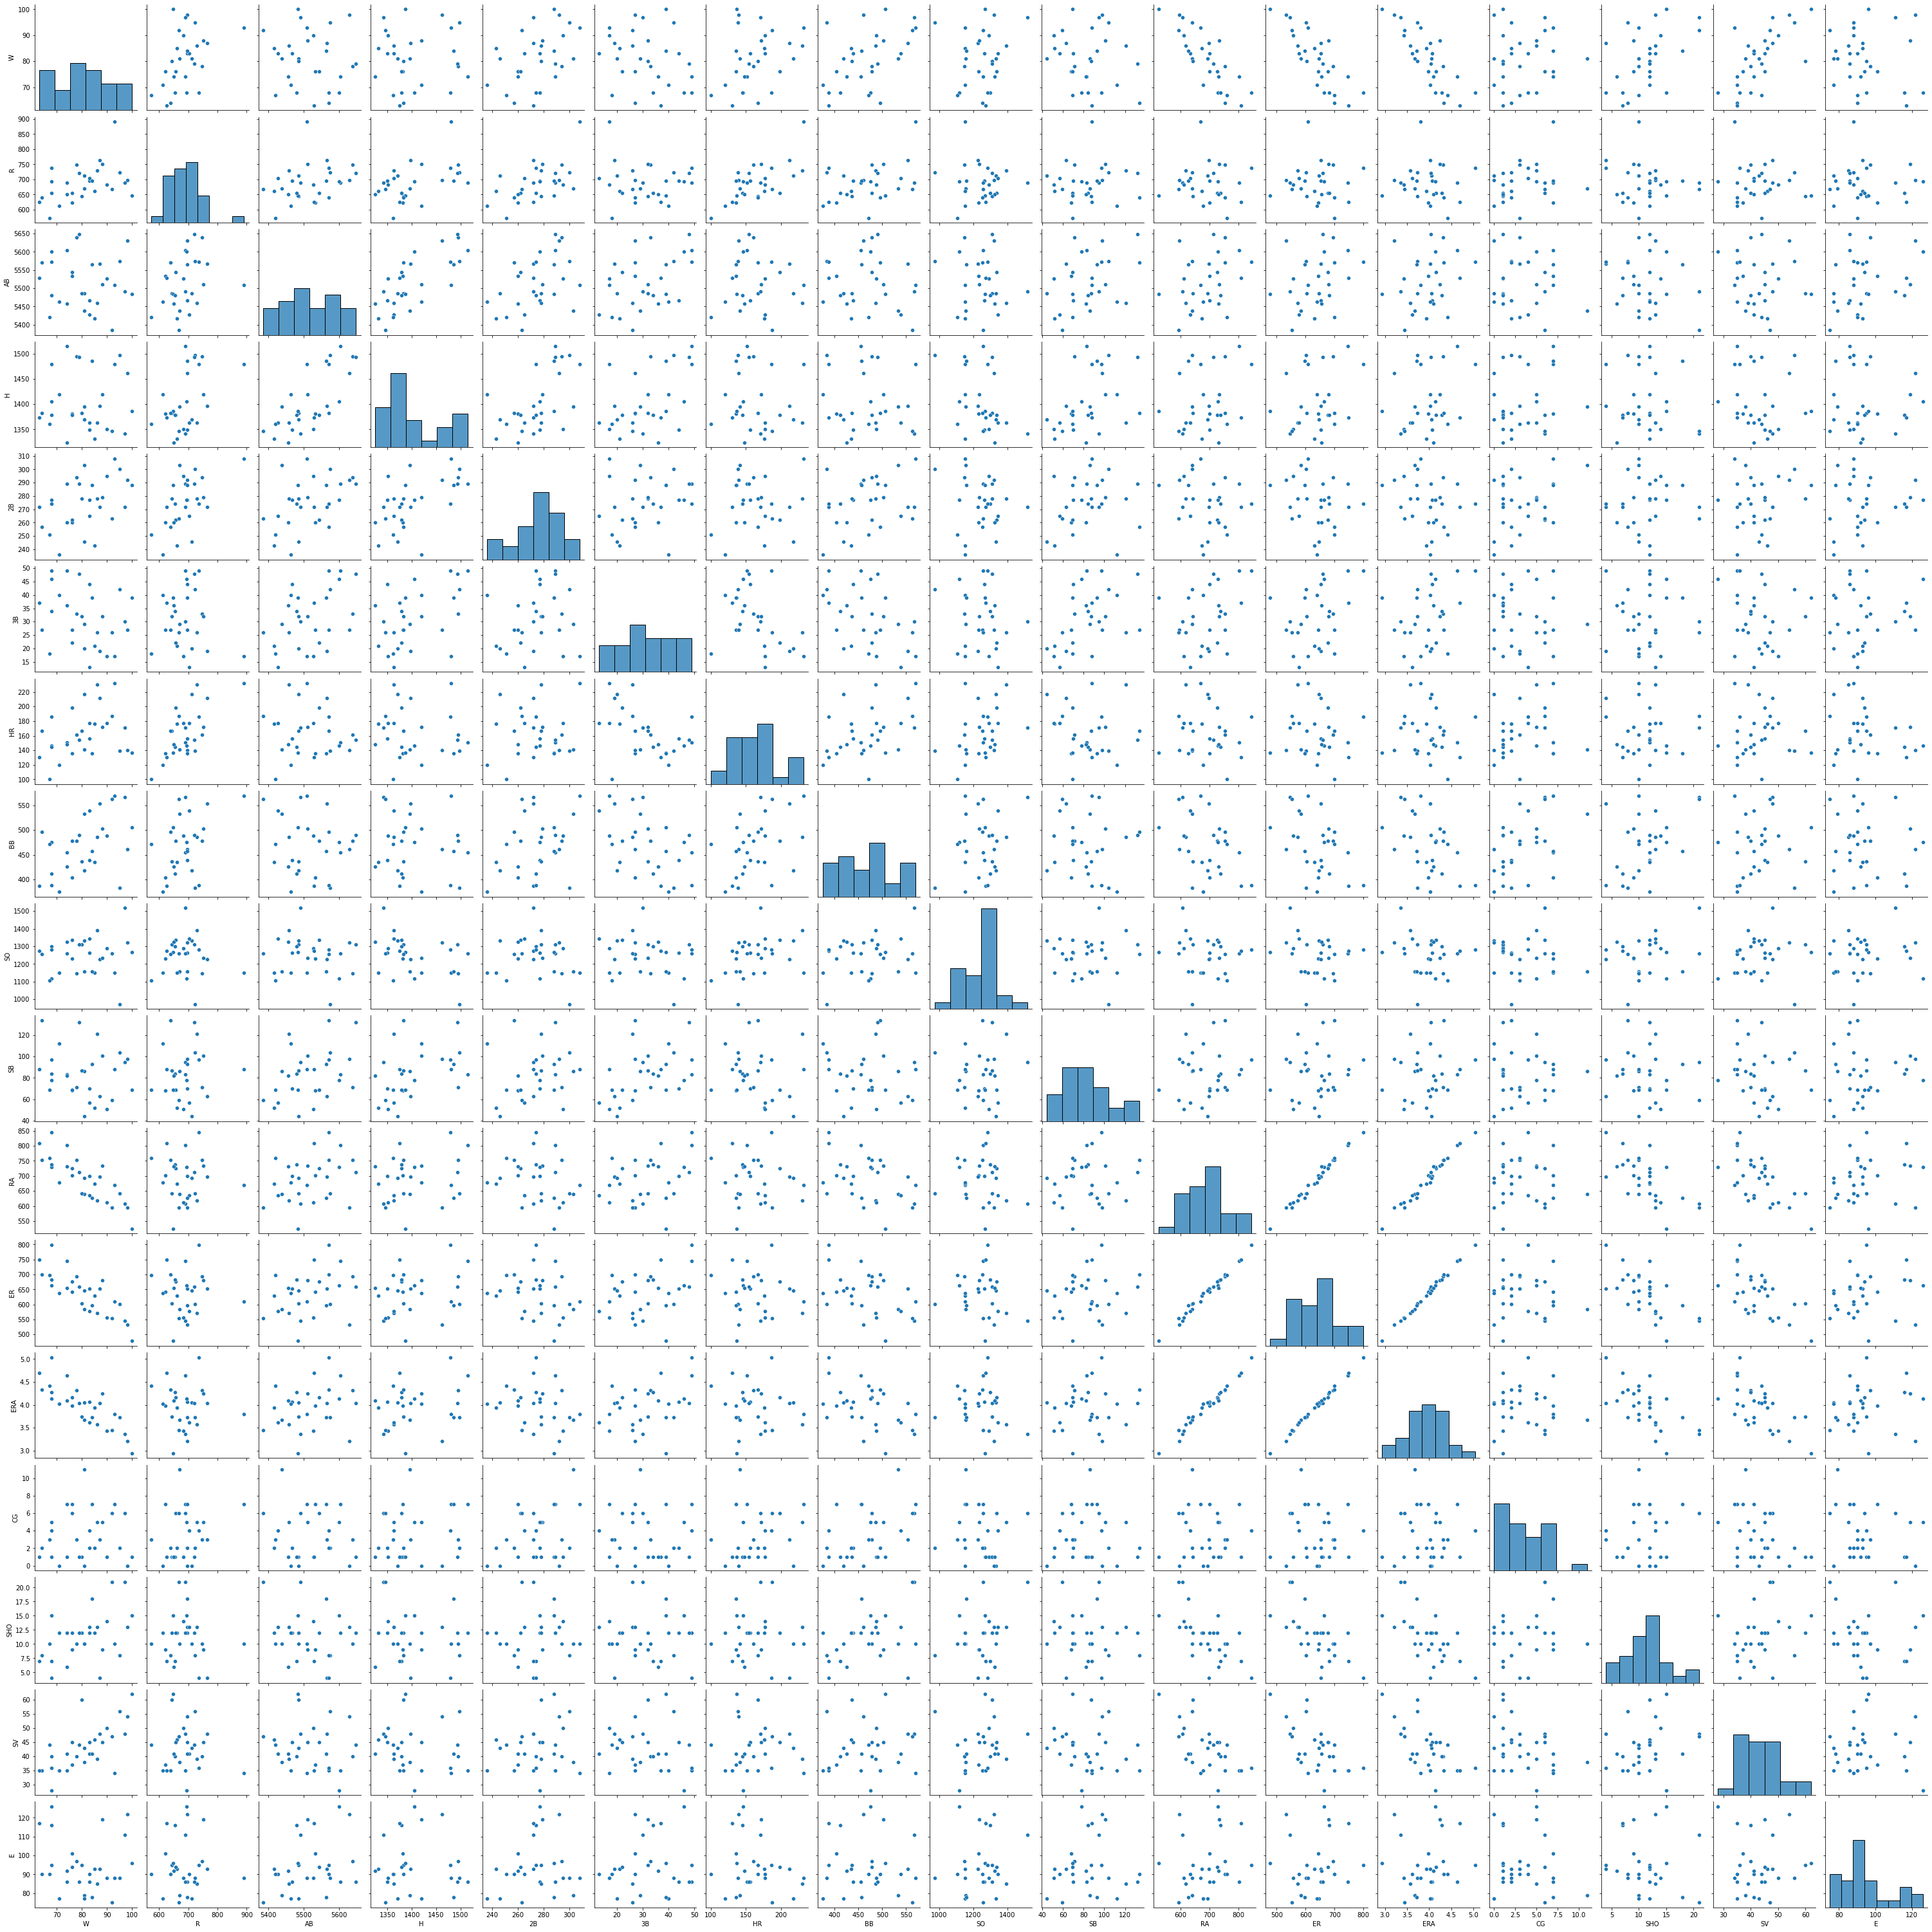

In [13]:
sns.pairplot(df)

Variables RA, ER, 3B and ERA are in negative linear correlation to the Wins. Variables SV, SHO, BB, HR and R are in positive correlation to the Wins. This is the observation from the above graph. For better understanding of correlated variables, Let's understand data and use heatmap to see correlations. 

# Describe Data

In [14]:
df.shape

(30, 17)

There are 30 rows and 17 columns in the Dataset.

In [15]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

These are the different variables present in our dataset.

In [16]:
#getting information of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


All our variables have integer datatype but the ERA variable has float datatype.

In [17]:
#Describing our data
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


<AxesSubplot:>

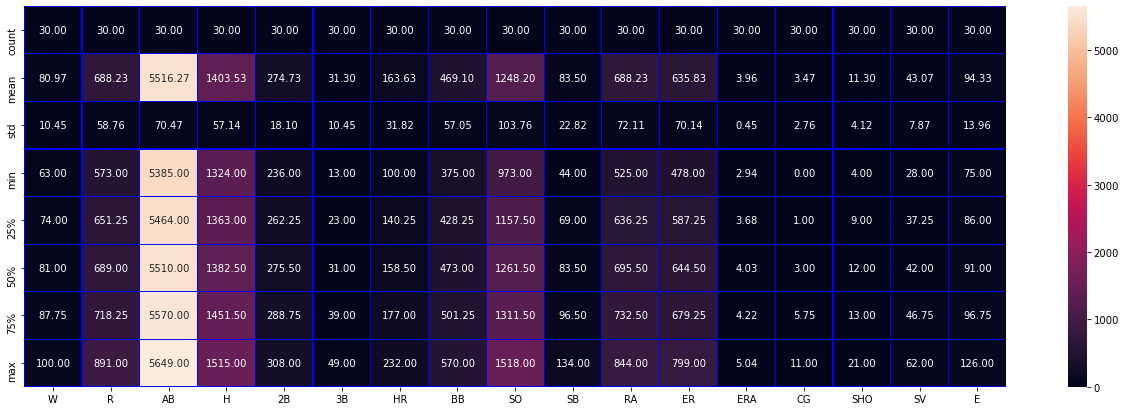

In [18]:
#Describing data using heatmap
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor='blue',fmt='0.2f')

From the above description we can see that data of most of the columns are broadly scattered i.e. the std of most columns are quite high.

There are no huge variations in the min and max values of each column which means that it has a less chance of having outliers.

Every column has a differnt range of values which shows huge variations in the values of a dataset.


# Correlation of Columns with the Target Variable

In [19]:
#Finding correlation between variables
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


We can see both Postive and Negative correlation between variables in the dataset.

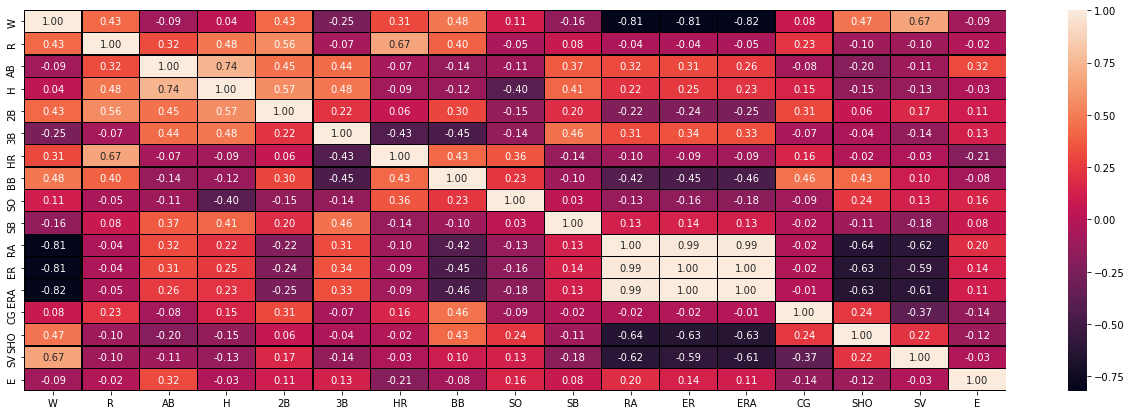

In [20]:
#Using heatmap to see Correlation
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')
plt.show()

Observations -

The most positively correlated columns to the number of Wins are Saves(SV), Shutouts(SHO), Walks(BB), Runs(R) and Doubles(2B)

The most negatively correlated columns to the number of WIns are Runs Allowed(RA),Earned Runs(ER)and Earned Run Average(ERA)

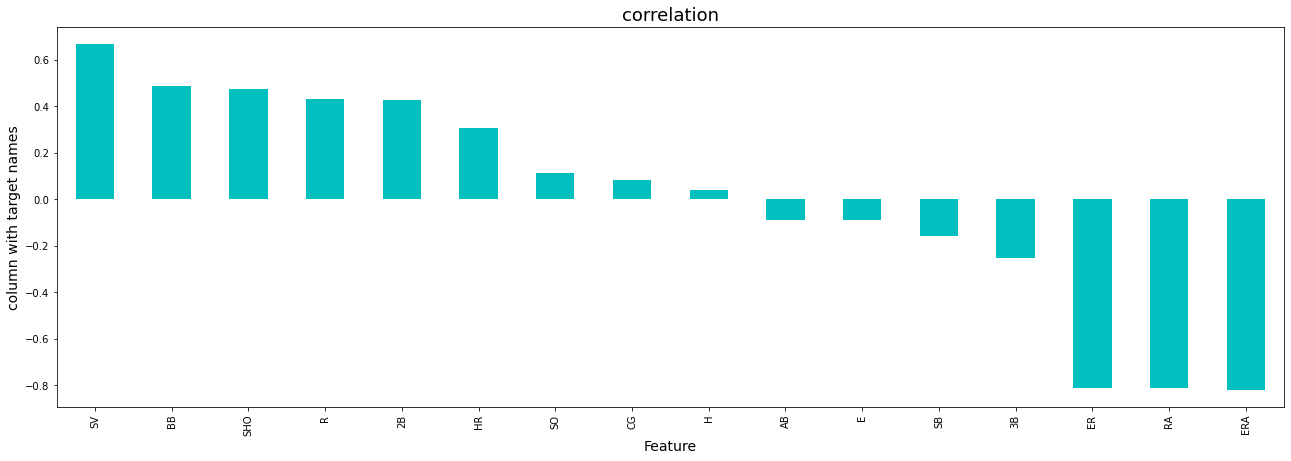

In [21]:
#Sorting correlation of input variables with the Target variable 
plt.figure(figsize=(22,7))
df.corr()['W'].sort_values(ascending=False).drop(['W']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Observation -

Variables SV, BB, SHO, R, 2B, HR, SO, CG & H  are positively correlated with the Target Variable i.e. Number of Wins(W)

Variables AB, E, SB, 3B, ER, RA & ERA are negatively correlated with the Target Variable i.e. Number of Wins(W)

# Checking Skewness

In [22]:
#Checking Skewness 
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

Keeping threshold +/-0.5 as the range for skewness, we can see that there is not much skewness in our data. Hardly some skewness can be seen in columns H, R, CG, SH0, SV & E. Let's try plotting skewness in columns using density graph.


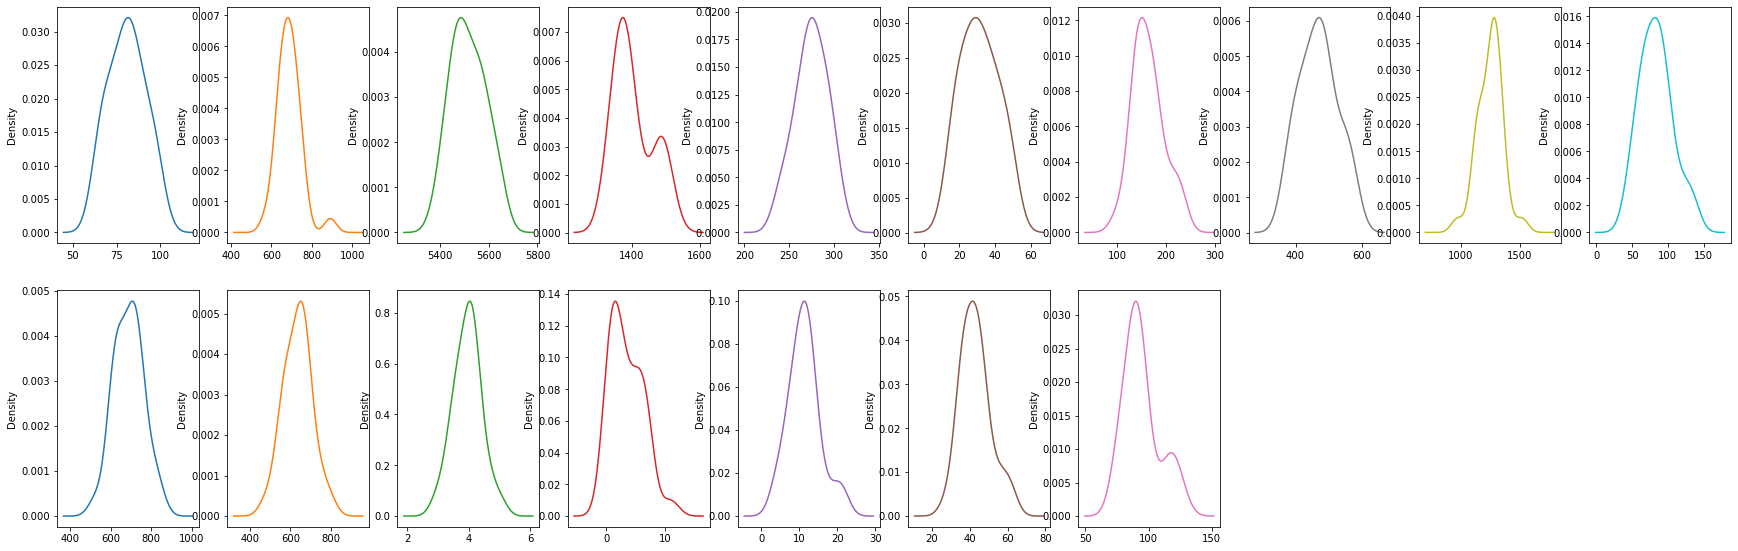

In [23]:
#Visualizing skewness on density graph
#Example of multi variate analysis
df.plot(kind='density',subplots=True,layout=(4,10),legend=False,sharex=False,figsize=(30,20))
plt.show()

We can observe that most of our data is normally distributed. Hardly, any skewness can be seen.

# Checking Outliers

In [24]:
#Checking datatype of data in each column 
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

All our variables have integer datatype but the ERA variable has float datatype.

<AxesSubplot:>

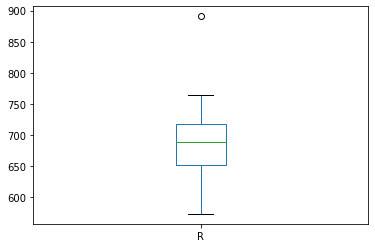

In [25]:
df['R'].plot.box()

Ony one outlier value can be found

<AxesSubplot:>

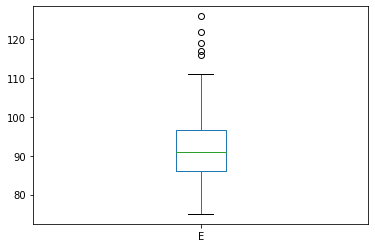

In [26]:
df['E'].plot.box()

Only few outliers can be detected

<AxesSubplot:>

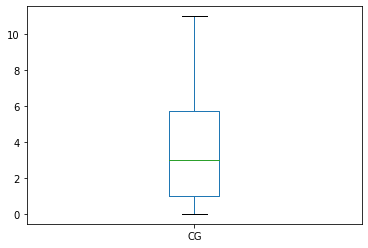

In [27]:
df['CG'].plot.box()

No outlier can be detected

W          AxesSubplot(0.125,0.71587;0.0824468x0.16413)
R       AxesSubplot(0.223936,0.71587;0.0824468x0.16413)
AB      AxesSubplot(0.322872,0.71587;0.0824468x0.16413)
H       AxesSubplot(0.421809,0.71587;0.0824468x0.16413)
2B      AxesSubplot(0.520745,0.71587;0.0824468x0.16413)
3B      AxesSubplot(0.619681,0.71587;0.0824468x0.16413)
HR      AxesSubplot(0.718617,0.71587;0.0824468x0.16413)
BB      AxesSubplot(0.817553,0.71587;0.0824468x0.16413)
SO        AxesSubplot(0.125,0.518913;0.0824468x0.16413)
SB     AxesSubplot(0.223936,0.518913;0.0824468x0.16413)
RA     AxesSubplot(0.322872,0.518913;0.0824468x0.16413)
ER     AxesSubplot(0.421809,0.518913;0.0824468x0.16413)
ERA    AxesSubplot(0.520745,0.518913;0.0824468x0.16413)
CG     AxesSubplot(0.619681,0.518913;0.0824468x0.16413)
SHO    AxesSubplot(0.718617,0.518913;0.0824468x0.16413)
SV     AxesSubplot(0.817553,0.518913;0.0824468x0.16413)
E         AxesSubplot(0.125,0.321957;0.0824468x0.16413)
dtype: object

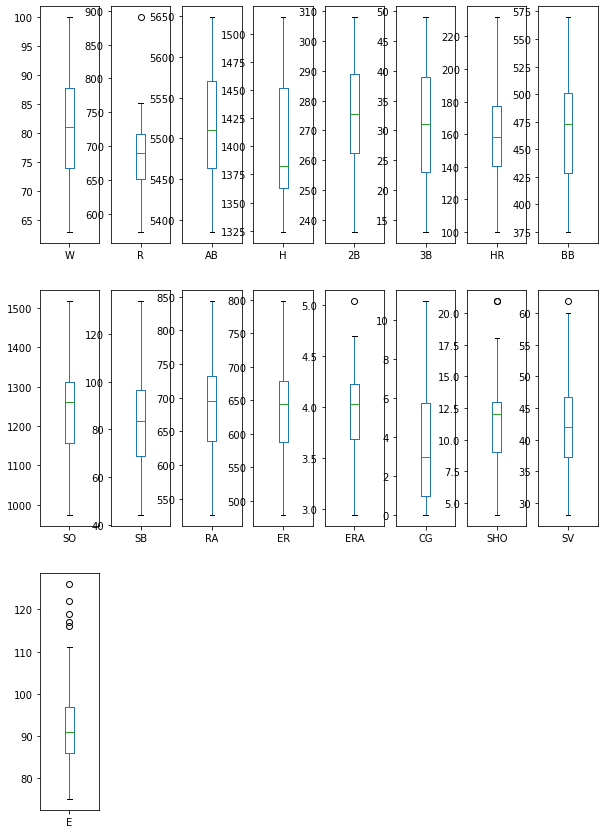

In [28]:
#Multivariate analysis to check outliers
df.plot(kind='box',subplots=True,layout=(4,8),figsize=(10,20))

There are very minimal number of outliers present which can be of huge importance to our data. Hence, we don't resolve them.

# Separating the column into x & y

In [29]:
x=df.drop('W',axis=1)
y=df['W']

Dropping column W from our x data and adding it to our y data.

# Scaling data using Standard Scaler


In [30]:
#importing library for scaling
from sklearn.preprocessing import StandardScaler

In [31]:
#Scaling our data to improve model performance
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.61907797,  0.84773126,  1.66368512,  1.42017307,  1.04119304,
        -0.7872986 , -1.53490242, -2.69762957,  0.91388329, -0.66623393,
        -0.50511008, -0.50695519, -0.5398062 , -0.81462859,  1.67160651,
        -0.46146963],
       [ 0.13443166, -0.71109353, -0.97068076,  0.12740339,  1.23580856,
        -0.24396668, -0.5365919 ,  0.15487844, -0.60182558,  0.16597077,
         0.24892985,  0.25459752, -0.5398062 ,  0.1728    ,  0.24987932,
        -0.60719689],
       [-0.33290586, -1.1152333 , -0.15189137,  1.58879521, -0.22380785,
        -0.7233772 ,  1.13914361, -0.89398189,  0.11144918, -0.68033909,
        -0.75162313, -0.64134684,  2.77264091, -0.32091429, -0.65485616,
        -1.11724227],
       [-1.14641931,  0.24152162, -0.40108814, -0.82812203, -0.41842337,
        -0.8831807 , -1.16053598, -0.16860185, -0.69098493,  0.18007593,
         0.10392217,  0.05301004,  1.3004422 , -0.56777144, -0.78410408,
         0.48575751],
       [ 0.01327008,  1.28073815,  1

Our int data automatically gets converted into float datatype when we use Standard Scaling.

# Model Building

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [33]:
lr=LinearRegression()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f'At random state {i}, the training accuracy is: {r2_score(y_train,pred_train)}')
    print(f'At random state {i}, the testing accuracy is: {r2_score(y_test,pred_test)}')
    print("\n")

At random state 0, the training accuracy is: 0.9609590618835543
At random state 0, the testing accuracy is: 0.6629341689506446


At random state 1, the training accuracy is: 0.9715846357165404
At random state 1, the testing accuracy is: 0.38417246900757474


At random state 2, the training accuracy is: 0.9898192153844542
At random state 2, the testing accuracy is: -2.0819989550103877


At random state 3, the training accuracy is: 0.9722553885185528
At random state 3, the testing accuracy is: 0.46183789706024414


At random state 4, the training accuracy is: 0.9647461497996579
At random state 4, the testing accuracy is: 0.46606852927277453


At random state 5, the training accuracy is: 0.950309288736999
At random state 5, the testing accuracy is: 0.7517105066858121


At random state 6, the training accuracy is: 0.9489470045214469
At random state 6, the testing accuracy is: 0.8376419521868405


At random state 7, the training accuracy is: 0.9631978535911321
At random state 7, the testing

At random state 176, we achieve our best accuracy of 92.5%

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=176)

Splitting our model into x & y with train data(x) 80% and test data(y) 20% at random state 176

In [35]:
lm=LinearRegression()
lm.fit(x_train,y_train)
pred=lm.predict(x_test)
print("Predicted W: ",pred)
print('actual W: ',y_test)

Predicted W:  [62.47000622 81.96956651 78.78508383 71.37560267 81.52230404 83.12427734]
actual W:  19    64
2     81
9     78
18    68
12    85
1     83
Name: W, dtype: int64


We can see there is a difference between the Predicted and the actual values. So, we will find the error rate of our model.

In [36]:
#Finding coefficient
lm.coef_

array([  7.55185321,  -1.67710285,   0.46618972,  -1.50263589,
         0.27605347,  -2.402939  ,  -1.3678697 ,   0.78904462,
        -0.62378099,   3.41048853,  11.25934745, -20.03226447,
         2.16406464,   0.6781296 ,   4.77131262,  -0.02742204])

In [37]:
#Finding intercept
lm.intercept_

80.974894687012

In [38]:
#training score
lm.score(x_train,y_train)

0.9456478942515564

Our training accuracy is 94.55%

In [39]:
#finding errors in our Model
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))

print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 1.710370015685817
Mean squared error: 4.566967377202576
Root Mean squared error: 2.13704641437723


We can observe quite a few errors in our model. In order to reduce the errors and increase efficiency and performance of the model, we will hypertune our model.

In [40]:
#Testing accuracy of the model
print(r2_score(y_test,pred))

0.9250292633017361


Testing accuracy of the model is 92.5%. This can also be the case due to overfitting of the model. Let's do cross validation for better training and testing of data.

# Cross Validation of Model

In [41]:
#importing library for cross Validation
from sklearn.model_selection import cross_val_score

In [42]:
#Finding best cv score at value cv
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {train_accuracy} and accuracy for the testing is {test_accuracy}")
    print("\n")

At cross fold 2 the cv score is -0.9911855504647467 and accuracy score for training is -1.305927307026876 and accuracy for the testing is -6.700301427840018


At cross fold 3 the cv score is 0.22588460167738203 and accuracy score for training is -1.305927307026876 and accuracy for the testing is -6.700301427840018


At cross fold 4 the cv score is 0.24952166654370014 and accuracy score for training is -1.305927307026876 and accuracy for the testing is -6.700301427840018


At cross fold 5 the cv score is 0.04075540667455883 and accuracy score for training is -1.305927307026876 and accuracy for the testing is -6.700301427840018


At cross fold 6 the cv score is 0.2515353093718637 and accuracy score for training is -1.305927307026876 and accuracy for the testing is -6.700301427840018


At cross fold 7 the cv score is 0.38908046442894645 and accuracy score for training is -1.305927307026876 and accuracy for the testing is -6.700301427840018


At cross fold 8 the cv score is 0.3193702210966

Since we get maximum accuracy at cv 7 i.e. 30.90%. So cv=7 is selected.

# Regularization

In [43]:
#Importing libraries for Regularization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [44]:
#Finding best Parameters for Lasso Regression
from sklearn.linear_model import Lasso

parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [45]:
#Performing Lasso Regression
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
lss

0.6771632431612664

The r2 score of Lasso Regression is 67.71%

In [46]:
cv_score=cross_val_score(ls,x,y,cv=7)
cv_mean=cv_score.mean()
cv_mean

0.5682912303719384

The cv score is 56.82%

# Ensemble Technique

In [47]:
#Importing libraries and finding best parameters
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'sqrt'}


In [48]:
#Performing RandomForestRegressor
rf=RandomForestRegressor(criterion='mse',max_features='log2')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print('R2 score: ',rfs*100)

rfscore=cross_val_score(rf,x,y,cv=7)
rfc=rfscore.mean()
print("Cross Val Score: ",rfc*100)

R2 score:  33.421668946648396
Cross Val Score:  7.028827279425888


The r2 score & Cross Val Score after performing RandomForestRegressor is 18.60% & 9.06% respectively. Hence we are not able to attain maximum accuracy out of our model. The dataset seems to be asymmetric.

# Saving Model

In [49]:
import pickle
filename='baseball.pkl'
pickle.dump(rf,open(filename,'wb'))